In [7]:
import os
import collections
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)


# part 1

In [2]:
infile = os.path.join(os.getcwd(), 'day06-input.txt')
os.stat(infile)

os.stat_result(st_mode=33204, st_ino=8913088, st_dev=64771, st_nlink=1, st_uid=1000, st_gid=1000, st_size=426, st_atime=1544092587, st_mtime=1544092543, st_ctime=1544092585)

In [3]:
with open(infile, 'rb') as f:
  lines = f.readlines()
lines = [l.decode('utf8').strip() for l in lines]
coords_str = [l.split(', ') for l in lines]
points = [tuple([int(n) for n in m]) for m in coords_str]
print('len(points): %d'% len(points))
points[0:10]

len(points): 50


[(194, 200),
 (299, 244),
 (269, 329),
 (292, 55),
 (211, 63),
 (123, 311),
 (212, 90),
 (292, 169),
 (359, 177),
 (354, 95)]

In [35]:
UNVISITED_VAL = -127
EQUIDISTANT_VAL = -99

def nearest(points, grid_size):
  nearest_grid = np.ndarray([grid_size,grid_size], dtype=np.int8) # index of nearest point
  nearest_grid.fill(UNVISITED_VAL)
  distance_grid = np.ndarray([grid_size,grid_size], dtype=np.int32) # distance from nearest point
  distance_grid.fill(UNVISITED_VAL)

  
  x_range = min([x[0] for x in points]), max([x[0] for x in points])
  print('x_range: %d, %d' % x_range)
  y_range = min([x[1] for x in points]), max([x[1] for x in points])
  print('y_range: %d, %d' % y_range)

  x_offset = int(grid_size/2 - (x_range[1] + x_range[0])/2)
  y_offset = int(grid_size/2 - (y_range[1] + y_range[0])/2)
  print('x_offset %d y_offset %d' % (x_offset, y_offset))
  
  for pi, (px, py) in enumerate(points):
    gx = px + x_offset
    gy = py + y_offset
    nearest_grid[gx, gy] = pi
    distance_grid[gx, gy] = 0
    
  for dist in range(1,300):
    if dist%10==0:
      print('at dist==%d' % dist)
    for pi, (px, py) in enumerate(points):
      gx = px + x_offset
      gy = py + y_offset
      for d1 in range(0,dist+1):
        d2 = dist-d1
        for cx, cy in [(gx+d1,gy+d2), (gx+d1,gy-d2), (gx-d1,gy+d2), (gx-d1,gy-d2) ]:
          if distance_grid[cx, cy] == UNVISITED_VAL:
            distance_grid[cx, cy] = dist
            nearest_grid[cx, cy] = pi
          elif distance_grid[cx, cy] == EQUIDISTANT_VAL:
            pass
          elif distance_grid[cx, cy] == dist and nearest_grid[cx, cy] != pi: # already visited in this pass
            distance_grid[cx, cy] = EQUIDISTANT_VAL
            nearest_grid[cx, cy] = EQUIDISTANT_VAL
  
  return nearest_grid, distance_grid, x_offset, y_offset

nearest_grid, distance_grid, x_offset, y_offset = nearest(points, grid_size=1000)

x_range: 54, 359
y_range: 47, 351
x_offset 293 y_offset 301
at dist==10
at dist==20
at dist==30
at dist==40
at dist==50
at dist==60
at dist==70
at dist==80
at dist==90
at dist==100
at dist==110
at dist==120
at dist==130
at dist==140
at dist==150
at dist==160
at dist==170
at dist==180
at dist==190
at dist==200
at dist==210
at dist==220
at dist==230
at dist==240
at dist==250
at dist==260
at dist==270
at dist==280
at dist==290


In [36]:
pi=20

px, py = points[pi]
show_range = 5
print('px, py = %d, %d' %(px, py))
px += x_offset
py += y_offset
# print(distance_grid[(px-show_range):(px+show_range+1), (py-show_range):(py+show_range+1) ])
# print(nearest_grid[(px-show_range):(px+show_range+1), (py-show_range):(py+show_range+1) ])


px, py = 180, 62


In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(nearest_grid)

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(distance_grid)

-99


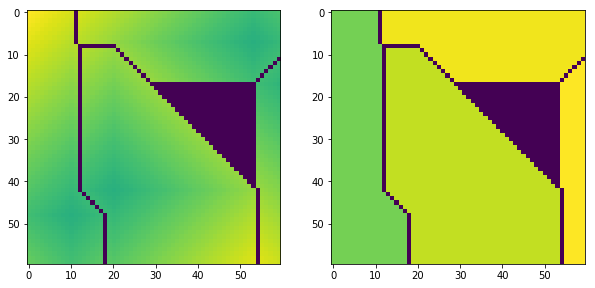

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(distance_grid[340:400,370:430])
ax[1].imshow(nearest_grid[340:400,370:430])
print(nearest_grid[360,420])

-127


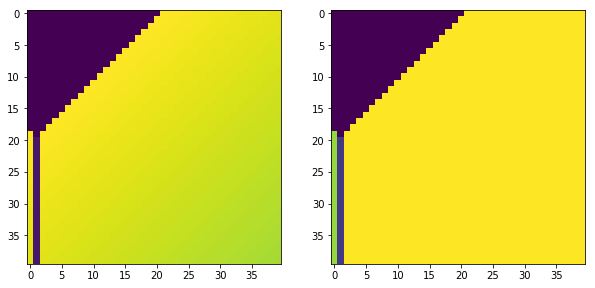

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(distance_grid[70:110,380:420])
ax[1].imshow(nearest_grid[70:110,380:420])
print(nearest_grid[70,380])

In [47]:
infinity_point_indices = set()
count_by_index = collections.defaultdict(int)
for x in range(1, nearest_grid.shape[0]-1):
  for y in range(1, nearest_grid.shape[1]-1):
    idx = nearest_grid[x,y]
    if idx==-127: continue
    if idx==-99: continue
    count_by_index[idx] += 1
    neighbours = [
      nearest_grid[x-1,y-1],
      nearest_grid[x-1,y+1],
      nearest_grid[x+1,y-1],
      nearest_grid[x+1,y+1]]
    if -127 in neighbours:
      infinity_point_indices.add(idx)
print('infinite points:')
print(infinity_point_indices)
print('counts excl infinite points:')
counts_no_inf = {i: c 
                 for (i,c) in count_by_index.items() 
                 if i not in infinity_point_indices}
print('counts_no_inf')
print(counts_no_inf)

infinite points:
{1, 2, 3, 4, 8, 9, 10, 11, 12, 14, 15, 19, 20, 23, 24, 25, 26, 29, 30, 33, 34, 35, 37, 39, 42, 43, 44, 45, 47, 48}
counts excl infinite points:
counts_no_inf
{40: 827, 27: 1778, 49: 4475, 21: 3035, 5: 2970, 22: 4317, 16: 3058, 0: 4322, 6: 1519, 17: 1750, 18: 2486, 31: 1920, 28: 1894, 32: 2915, 41: 1125, 13: 3141, 38: 1832, 46: 972, 7: 1564, 36: 1834}


In [51]:
sorted(counts_no_inf.values())[-1]

4475

# part 2



In [110]:
def dist(x,y,points):
  dist_sum = 0 
  for px, py in points:
    dist_sum += abs(x-px) + abs(y-py)
  return dist_sum


In [118]:
xmin = 0
xmax = 500
ymin = 0
ymax = 500

n_edge = [dist(x,0,points) for x in range(xmin,xmax+1)]
s_edge = [dist(x,ymax,points) for x in range(xmin,xmax+1)]
w_edge = [dist(xmin,y,points) for y in range(ymin,ymax+1)]
e_edge = [dist(xmax,y,points) for y in range(ymin,ymax+1)]
n_range = (min(n_edge), max(n_edge))
print('n_range: %d - %d' % n_range)
s_range = (min(s_edge), max(s_edge))
print('s_range: %d - %d' % s_range)
w_range = (min(w_edge), max(w_edge))
print('w_range: %d - %d' % w_range)
e_range = (min(e_edge), max(e_edge))
print('e_range: %d - %d' % e_range)

# these are all >10k, so we're good.

n_range: 13476 - 23932
s_range: 19744 - 30200
w_range: 14412 - 26068
e_range: 18544 - 30200


In [119]:
under_10k_count = 0
for x in range(xmin,xmax+1):
  for y in range(ymin,ymax+1):
    if dist(x,y,points)<10000:
      under_10k_count += 1
print('under_10k_count: %d' % under_10k_count)

under_10k_count: 35237
